# Question 1

---
We're given that $P(pass) = 0.9$, $P(quick|pass) = 0.6$, and $P(quick|fail) = 0.3$. We wish to find $P(pass|quick)$. Applying Bayes' Theorem, we see that 

$$P(pass|quick) = \frac{P(quick|pass)P(pass)}{P(quick)}$$

By the law of total probability, the denominator can be written as 

$$P(quick) = P(quick|pass)P(pass) + P(quick|fail)P(fail)$$

where $P(fail) = 0.1$ because a student either passes or fails. Plugging in the results so far, we get

\begin{align*}
P(pass|quick) &= \frac{P(quick|pass)P(pass)}{P(quick|pass)P(pass) + P(quick|fail)P(fail)} \\
&= \frac{(0.6)(0.9)}{(0.6)(0.9) + (0.3)(0.1)} \\
&= \frac{0.54}{0.57} \\
&= 0.95
\end{align*}

# Question 2
---
Fix $n \in \mathbb N$. Let 

$$\theta = \begin{pmatrix} \theta_1 \\ \vdots \\ \theta_n \end{pmatrix}$$ 

be a vector of probabilities that we're interested in. Let 

$$x = \begin{pmatrix} x_1 \\ \vdots \\ x_k \end{pmatrix}$$

be our data vector, where $\sum_{i=1}^k x_i = n$. The PMF of the multinomial distribution takes on the form

$$p(x|\theta, n) = c_1\prod_{k=1}^n\theta_k^{x_k}$$

for some constant $c_1$. Let 

$$\boldsymbol \alpha = \begin{pmatrix} \alpha_1 \\ \vdots \\ \alpha_k \end{pmatrix}$$ 

represent the parameters of the dirichlet distribution, where the distribution takes the form

$$p(\theta|\boldsymbol\alpha) = c_2\prod_{k=1}^n \theta_k^{\alpha_k - 1}$$

for some constant $c_2$. When computing the posterior distribution, the marginal likelihood is a constant, which we'll denote $c_3$. Thus, by Bayes Theorem we have 

\begin{align*}
p(\theta|x, n, \boldsymbol\alpha) &= \frac{c_1\left(\prod_{k=1}^n\theta_k^{x_k}\right)c_2\left(\prod_{k=1}^n \theta_k^{\alpha_k - 1}\right)}{c_3} \\
&= c\prod_{k=1}^n\theta_k^{x_k + \alpha_k - 1}
\end{align*}

where $c = c_1c_2/c_3$. The kernel of the posterior is the Dirichlet$(\alpha + x)$ distribution. 

# Question 3
---

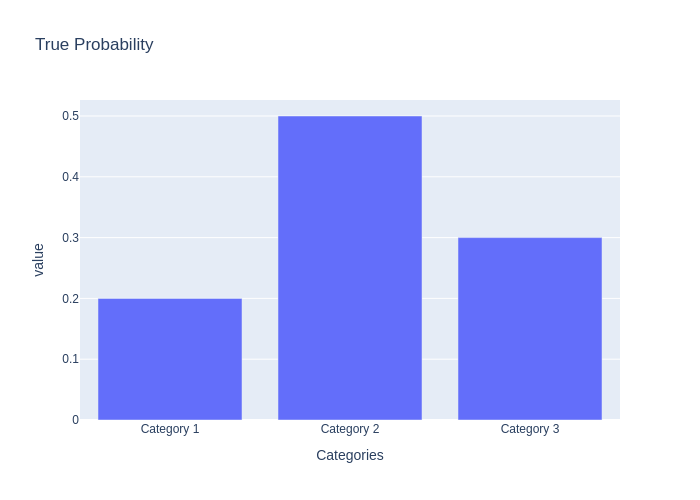

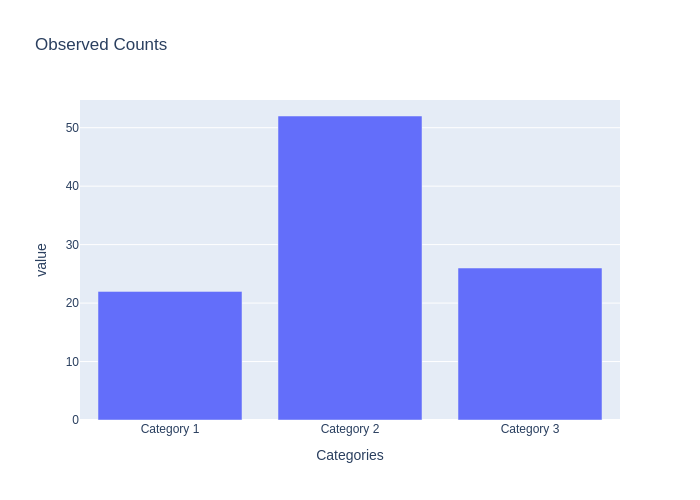

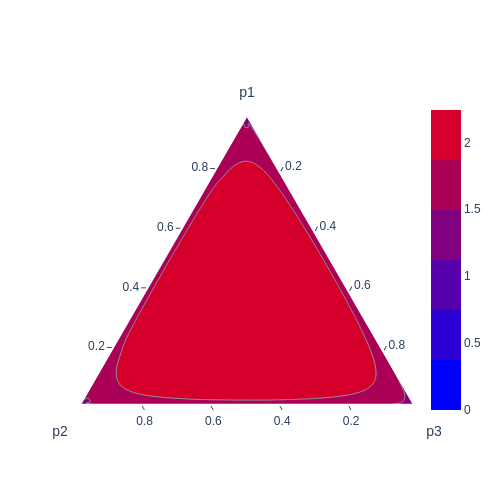

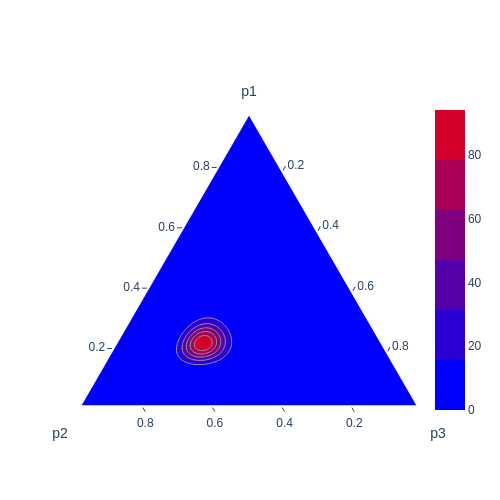

In [18]:
import numpy as np
from scipy import stats
import plotly.figure_factory as ff  
import plotly.express as px
import random

random.seed(10)

###############################################################################
# 1. Define the true probabilities (theta) for 3 categories:
###############################################################################
theta = np.array([0.2, 0.5, 0.3]) 

###############################################################################
# 2. Draw a sample x from the multinomial distribution:
###############################################################################
N = 100  # total count (number of "trials")
x = np.random.multinomial(N, theta)

###############################################################################
# 3. Visualize the Multinomial distribution and the observed sample:
###############################################################################
categories = ["Category 1", "Category 2", "Category 3"]
truedata = {
    "Categories": ["Category 1", "Category 2", "Category 3"],
    "value": theta
}
obsdata = {
    "Categories": ["Category 1", "Category 2", "Category 3"],
    "value": x
}

fig = px.bar(truedata, x="Categories", y="value", title="True Probability")
fig.show("png")

fig = px.bar(obsdata, x="Categories", y="value", title="Observed Counts")
fig.show("png")

###############################################################################
# 4. Create Ternary plot of the prior and posterior distributions
###############################################################################
p1 = np.linspace(0,1,100)
p2 = 1-p1.copy()
p_ = np.linspace(0,1,100)
p1 = (p1[np.newaxis,:]*p_[:,np.newaxis]).flatten()
p2 = (p2[np.newaxis,:]*p_[:,np.newaxis]).flatten()
p3 = 1-p1-p2
p = np.c_[p1,p2,p3]

alpha_prior = np.array([1.1, 1.1, 1.1])  # Prior alpha values
dirichlet_prior = stats.dirichlet(alpha=alpha_prior)
dirichlet_prior_densities = dirichlet_prior.pdf(p.T)

fig = ff.create_ternary_contour(p.T, dirichlet_prior.pdf(p.T),
                                pole_labels=['p1', 'p2', 'p3'],
                                interp_mode='cartesian',
                                showscale=True)
fig.show('png')

alpha_post = np.array([1.1, 1.1, 1.1]) + x  # Prior alpha values
dirichlet_post = stats.dirichlet(alpha=alpha_post)
dirichlet_post_densities = dirichlet_post.pdf(p.T)

fig = ff.create_ternary_contour(p.T, dirichlet_post.pdf(p.T),
                                pole_labels=['p1', 'p2', 'p3'],
                                interp_mode='cartesian',
                                showscale=True)
fig.show('png')